


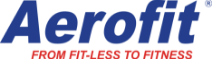

*Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.*


### Business Problem:

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set_theme(style="darkgrid")

In [32]:
df=pd.read_table('aerofit_treadmill.txt', delimiter=',')

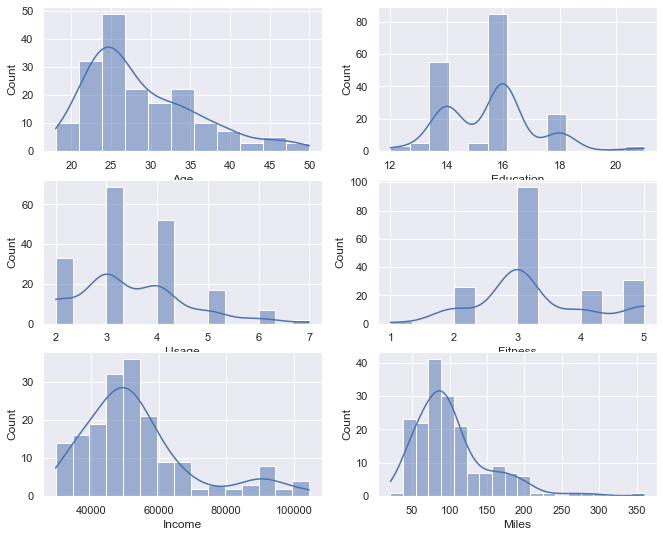

In [5]:
fig, axis =plt.subplots(nrows=3 ,ncols=2 , figsize =(11,9))

sns.histplot(data=df,x='Age',kde=True,ax=axis[0,0])
sns.histplot(data=df,x='Education',kde=True,ax=axis[0,1])
sns.histplot(data=df,x='Usage',kde=True,ax=axis[1,0])
sns.histplot(data=df,x='Fitness',kde=True,ax=axis[1,1])
sns.histplot(data=df,x='Income',kde=True,ax=axis[2,0])
sns.histplot(data=df,x='Miles',kde=True,ax=axis[2,1])
plt.show()

### Dataset:
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

In [5]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The dataset contains 180 entries and no row has the null value in the dataset.
The data type of each column is correctly defined so no need to change it. 
There are total of 9 columns.

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000



## **Missing Value & Outlier Detection.**

In [36]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

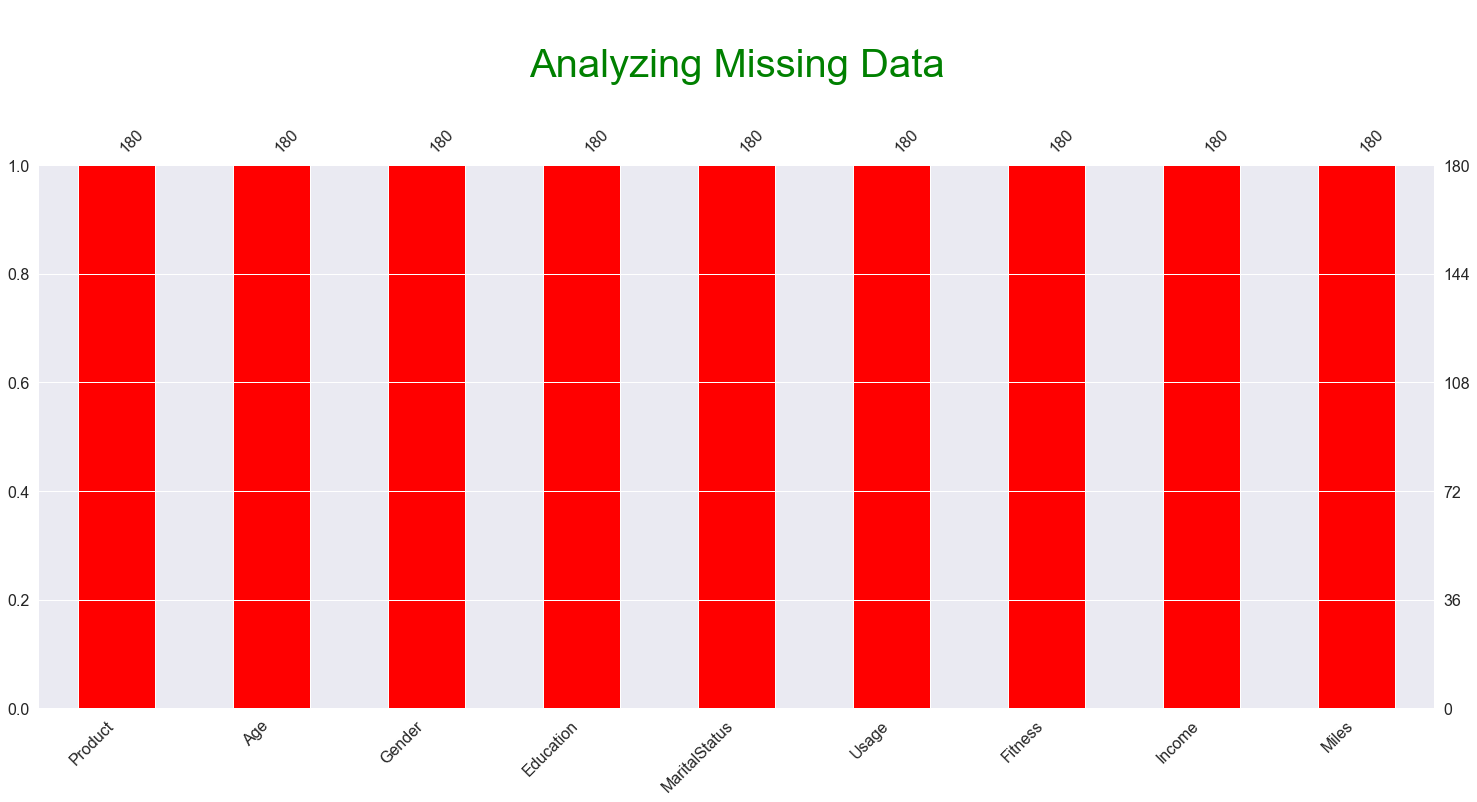

In [39]:
msno.bar(df, color='red')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

# Detecting Outliers

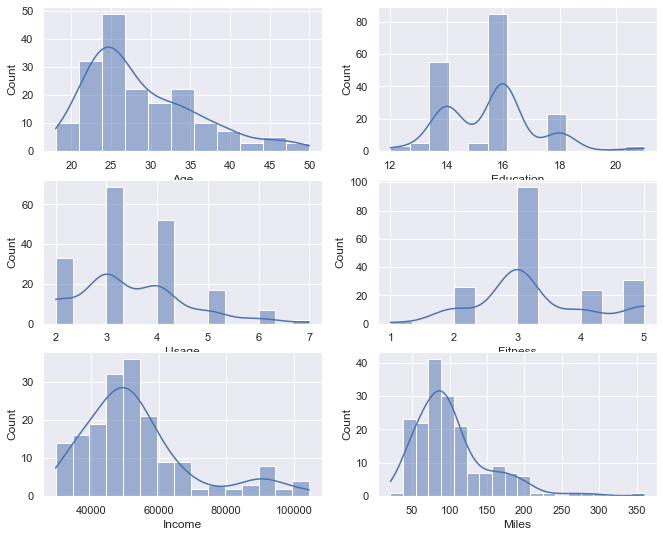

In [5]:
fig, axis =plt.subplots(nrows=3 ,ncols=2 , figsize =(11,9))

sns.histplot(data=df,x='Age',kde=True,ax=axis[0,0])
sns.histplot(data=df,x='Education',kde=True,ax=axis[0,1])
sns.histplot(data=df,x='Usage',kde=True,ax=axis[1,0])
sns.histplot(data=df,x='Fitness',kde=True,ax=axis[1,1])
sns.histplot(data=df,x='Income',kde=True,ax=axis[2,0])
sns.histplot(data=df,x='Miles',kde=True,ax=axis[2,1])
plt.show()

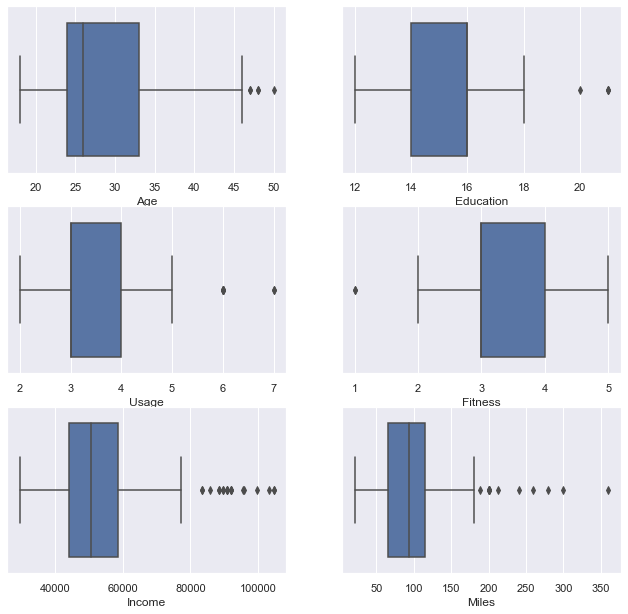

In [40]:
fig, axis =plt.subplots(nrows=3 ,ncols=2 , figsize =(11,9))
fig.subplots_adjust(top=1)

sns.boxplot(data=df ,x='Age',orient='h',ax=axis[0,0])
sns.boxplot(data=df ,x='Education',orient='h',ax=axis[0,1])
sns.boxplot(data=df ,x='Usage',orient='h',ax=axis[1,0])
sns.boxplot(data=df ,x='Fitness',orient='h',ax=axis[1,1])
sns.boxplot(data=df ,x='Income',orient='h',ax=axis[2,0])
sns.boxplot(data=df ,x='Miles',orient='h',ax=axis[2,1])
plt.show()

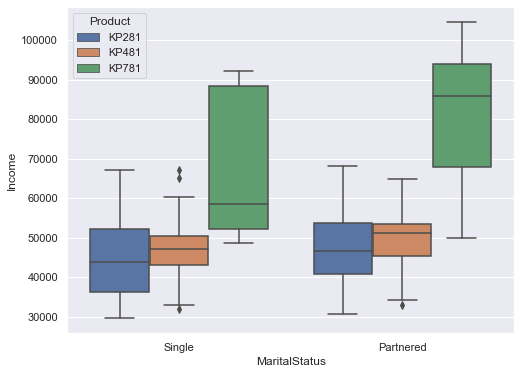

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='MaritalStatus', y='Income',hue='Product', data=df)
plt.show()

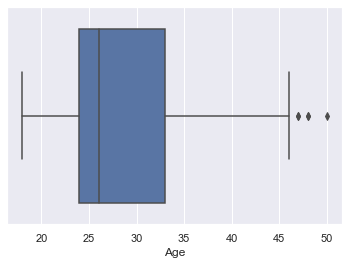

In [7]:
sns.boxplot(data=df,x='Age')
plt.show()

In [7]:
IQR=np.percentile(df['Age'],75)-np.percentile(df['Age'],25)
print('IQR: ',IQR)
Lower_value=np.percentile(df['Age'],25)-1.5*IQR
print('Lower Inner Fence: ',Lower_value)
Higher_value=np.percentile(df['Age'],75)+1.5*IQR
print('Higher Inner Fence: ',Higher_value)

IQR:  9.0
Lower Inner Fence:  10.5
Higher Inner Fence:  46.5


In [8]:
df[df['Age']>46.5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


From the above tables, we can see that the outliers in the Age column are: 47,48,50

For Income:

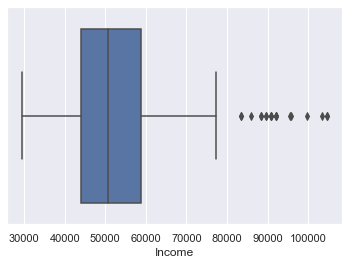

In [8]:
sns.boxplot(data=df,x='Income')
plt.show()

In [10]:
IQR=np.percentile(df['Income'],75)-np.percentile(df['Income'],25)
print('IQR: ',IQR)
Lower_value=np.percentile(df['Income'],25)-1.5*IQR
print('Lower Inner Fence: ',Lower_value)
Higher_value=np.percentile(df['Income'],75)+1.5*IQR
print('Higher Inner Fence: ',Higher_value)

IQR:  14609.25
Lower Inner Fence:  22144.875
Higher Inner Fence:  80581.875


In [11]:
df[df['Income']>Higher_value]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


All the outliers in the Income column is from the product category 'KP781' which is the most expensive treadmill and from the data it clearly shows that its buyer earn more money.

Since the product is divided into 3 categories:

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

In [12]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Revenue Generated from the 3 products are:

KP281= 80*1500$= $120,000

KP481= 60*1750$= $105,000

KP781= 40*2500$= $100,000

## Aerofit generates it's revenue more from the model KP281 as the buyers of this product is 33% more than average buyer of a single product.


In [197]:
df_KP281=df[df['Product']=='KP281']
df_KP481=df[df['Product']=='KP481']
df_KP781=df[df['Product']=='KP781']

In [42]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [15]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

### Marital Status: Single

In [10]:
df_Single=df[df['MaritalStatus']=='Single']

In [11]:
df_Single['Product'].value_counts()

KP281    32
KP481    24
KP781    17
Name: Product, dtype: int64

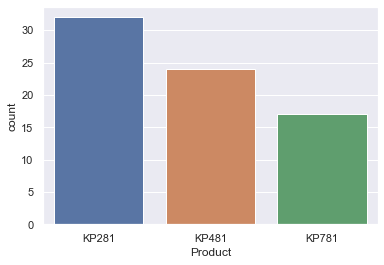

In [12]:
sns.countplot(data=df_Single,x='Product')
plt.show()

### Conditinal Probability of different product bought given that a person is Single
## P(No. of particular product bought | buyer is Single)

Probability of purchasing a particular product by Customer:

Probability for KP281= 32/(32+24+17)=32/73= 43% 
<br>Probability for KP481= 24/73= 32.8%
<br>Probability for KP781= 17/73= 23.3%


If the status of the customer is single, the probability to buy the product KP281 is higher among all the product.

### Marital Status: Partnered

In [13]:
df_Partnered=df[df['MaritalStatus']=='Partnered']

In [14]:
df_Partnered['Product'].value_counts()

KP281    48
KP481    36
KP781    23
Name: Product, dtype: int64

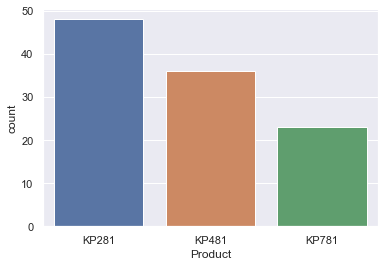

In [15]:
sns.countplot(data=df_Partnered, x='Product')
plt.show()

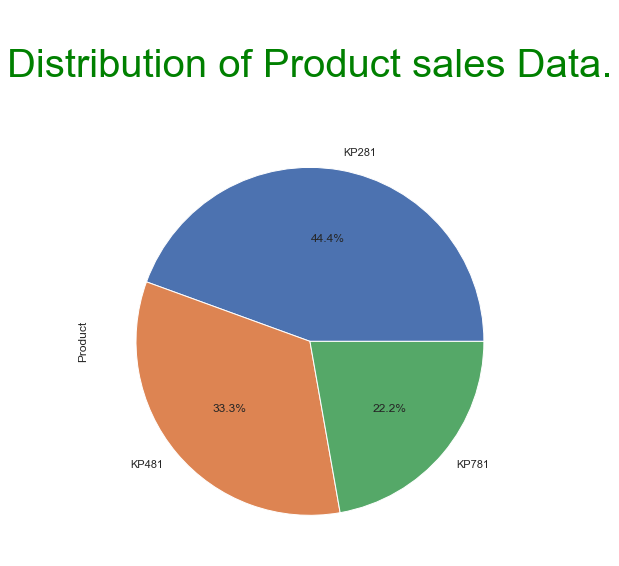

In [35]:
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("\nDistribution of Product sales Data.\n", fontsize=40, color="green")
plt.show()

### Conditinal Probability of different product bought given that a person is Partnered
## P(No. of particular product bought | buyer is Partnered)

Probability of purchasing a particular product by Partnered Customer:

Probability for KP281= 48/107= 44.85%
<br>Probability for KP481= 36/107= 33.64%
<br>Probability for KP781= 23/107= 21.5%

If the status of the customer is Partnered, the probability to buy the product KP281 is higher among all the product

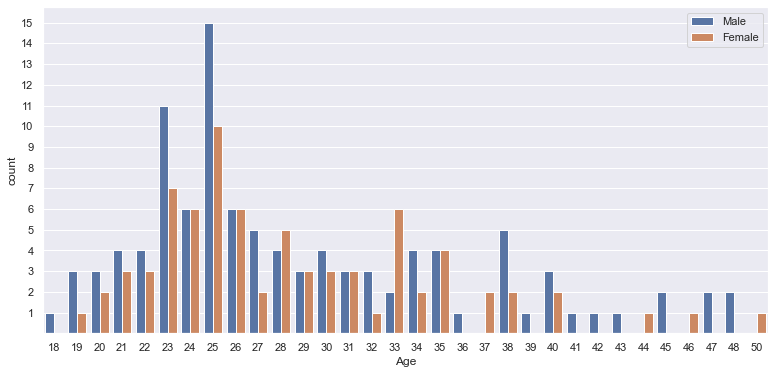

In [16]:
plt.figure(figsize=(13,6))
plt.yticks(np.arange(1,26))
sns.countplot(x='Age',hue='Gender',data=df)
plt.legend(loc='upper right')
plt.show()

Prople in the age between 23 to 26 uses treadmill more often.
<br>Age of 25 years seems to be more ideal for targetting both Male and Female.
<br>After the age of 40 years, the probability of men buying treadmill is 9/12 and for female is 3/12.

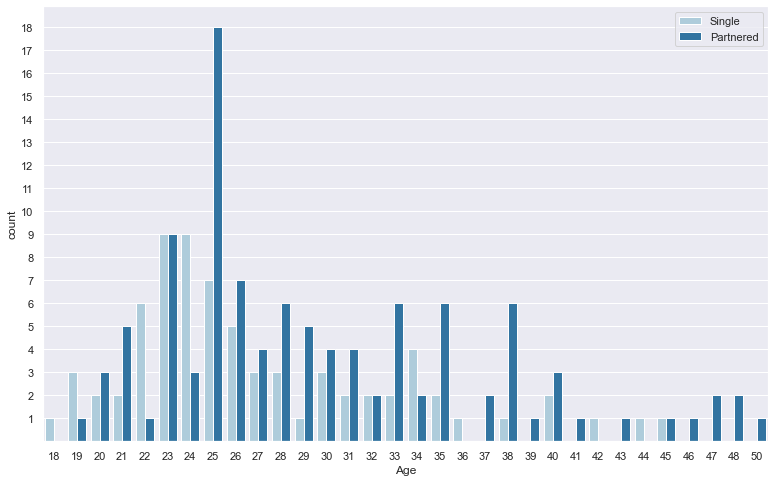

In [17]:
plt.figure(figsize=(13,8))
plt.yticks(np.arange(1,26))
sns.countplot(x='Age',hue='MaritalStatus',data=df,color='green', palette='Paired')
plt.legend(loc='upper right')
plt.show()

#### Following graph shows the count of people buying a product according to their age:


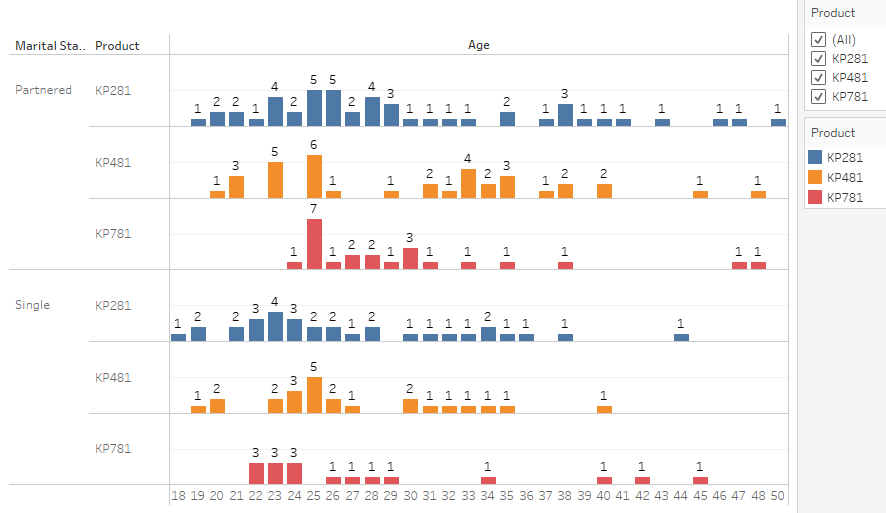

The probability of buying a product KP781 in the age between 22 to 30 is 77.5% of the total sale product KP781.


# Marginal Probability

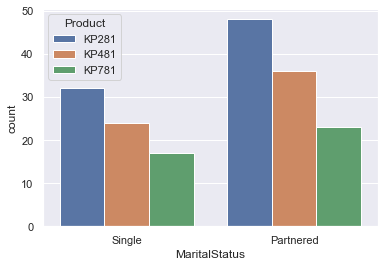

In [18]:
sns.countplot(x='MaritalStatus',hue='Product', data=df)
plt.show()

Marginal probability between Product and Marital Status of a customer:

In [66]:
pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


Probability of Partnered Person bought the product KP281 = 48/180=26.6%
<br>Probability of Single Person bought the product KP281 = 32/180=17.8%

Probability of Partnered Person bought the product KP481 = 36/180=20%
<br>Probability of Single Person bought the product KP481 = 24/180=13.3%

Probability of Partnered Person bought the product KP781 = 23/180=12.7%
<br>Probability of Single Person bought the product KP781 = 17/180=9.4%

Probability of Partnered people bought any of the product is 107/180= 59.5%
<br>Probability of Single people bought any of the product is 73/180= 40.5%

Marginal probability between Product and Gender of a customer:

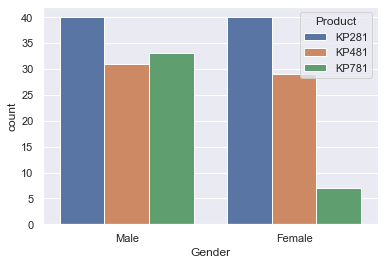

In [19]:
sns.countplot(x='Gender',hue='Product', data=df)
plt.show()

In [69]:
pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Probability of Male among total no. of Males buying KP281 is 40/104=38.5%
<br>Probability of Male among total no. of Males buying KP481 is 31/104=29.8%
<br>Probability of Male among total no. of Males buying KP781 is 33/104=31.7%

Probability of Female among total no. of Females buying KP281 is 40/76=52.6%
<br>Probability of Female among total no. of Females buying KP481 is 29/76=38.15%
<br>Probability of Female among total no. of Females buying KP781 is 7/76=9.2%

Marginal probability between Product, Gender and Marital Status of a customer:

In [78]:
pd.crosstab(df['Product'], [df['MaritalStatus'],df['Gender']], margins=True)

MaritalStatus Partnered      Single       All
Gender           Female Male Female Male     
Product                                      
KP281                27   21     13   19   80
KP481                15   21     14   10   60
KP781                 4   19      3   14   40
All                  46   61     30   43  180

Probability of buying a product KP281 by a Female whose Marital Status is partnered = 27/180= 15%
<br>Probability of buying a product KP481 by a Female whose Marital Status is partnered = 15/180= 8.33%
<br>Probability of buying a product KP781 by a Female whose Marital Status is partnered = 4/180= 2.22%

Probability of buying any product by Female whose Marital Status is partnered = 46/180= 25.55%
<br>--------------------------------------------------------------------------------------------------------------------------

Probability of buying a product KP281 by a Female whose Marital Status is Single = 13/180= 7.22%
<br>Probability of buying a product KP481 by a Female whose Marital Status is Single = 14/180= 7.77%
<br>Probability of buying a product KP781 by a Female whose Marital Status is Single = 3/180= 1.66%

Probability of buying any product by Female whose Marital Status is Single = 30/180= 16.66%
<br>--------------------------------------------------------------------------------------------------------------------------


Probability of buying a product KP281 by a male whose Marital Status is partnered = 21/180= 11.66%
<br>Probability of buying a product KP481 by a male whose Marital Status is partnered = 21/180= 11.66%
<br>Probability of buying a product KP781 by a male whose Marital Status is partnered = 19/180= 10.55%

Probability of buying any product by male whose Marital Status is partnered = 61/180= 33.88%
<br>--------------------------------------------------------------------------------------------------------------------------

Probability of buying a product KP281 by a male whose Marital Status is Single = 19/180= 10.55%
<br>Probability of buying a product KP481 by a male whose Marital Status is Single = 10/180= 5.55%
<br>Probability of buying a product KP781 by a male whose Marital Status is Single = 14/180= 7.77%

Probability of buying any product by male whose Marital Status is Single = 43/180= 23.88%

### Fitness and Usage

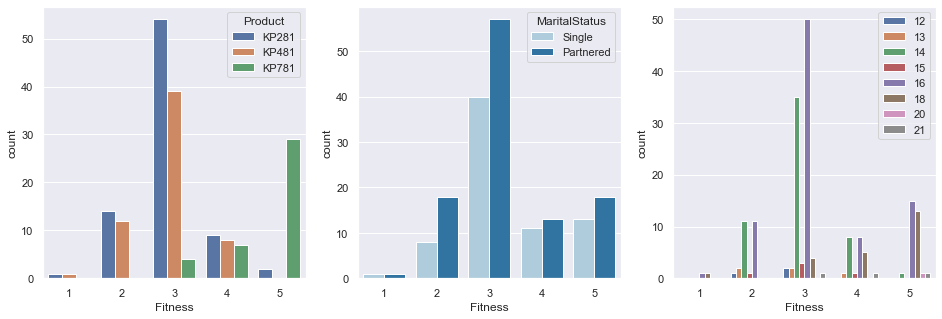

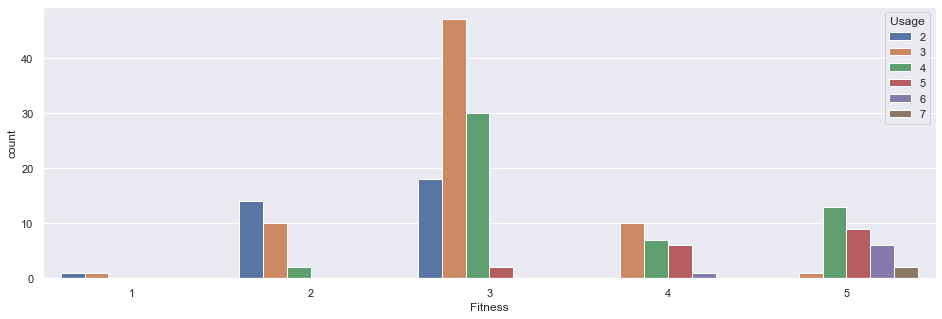

In [22]:
fig, ax =plt.subplots(1,3,figsize=(16,5))

sns.countplot(x='Fitness',hue='Product', data=df,ax=ax[0])
sns.countplot(x='Fitness',hue='MaritalStatus', data=df,color='blue', palette='Paired',ax=ax[1])
sns.countplot(x='Fitness', hue='Education', data=df, ax=ax[2])
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16,5))
sns.countplot(x='Fitness',hue='Usage', data=df)

plt.show()

From the above plots, we can say that:
1.) If customer average usage of treadmill is more than 5 times a week, then he will buy KP781 only. i.e. 

#       P['KP781'|Usage>5]= 100%

i.e. customer with usage>5 will not buy the product KP281 and KP481.

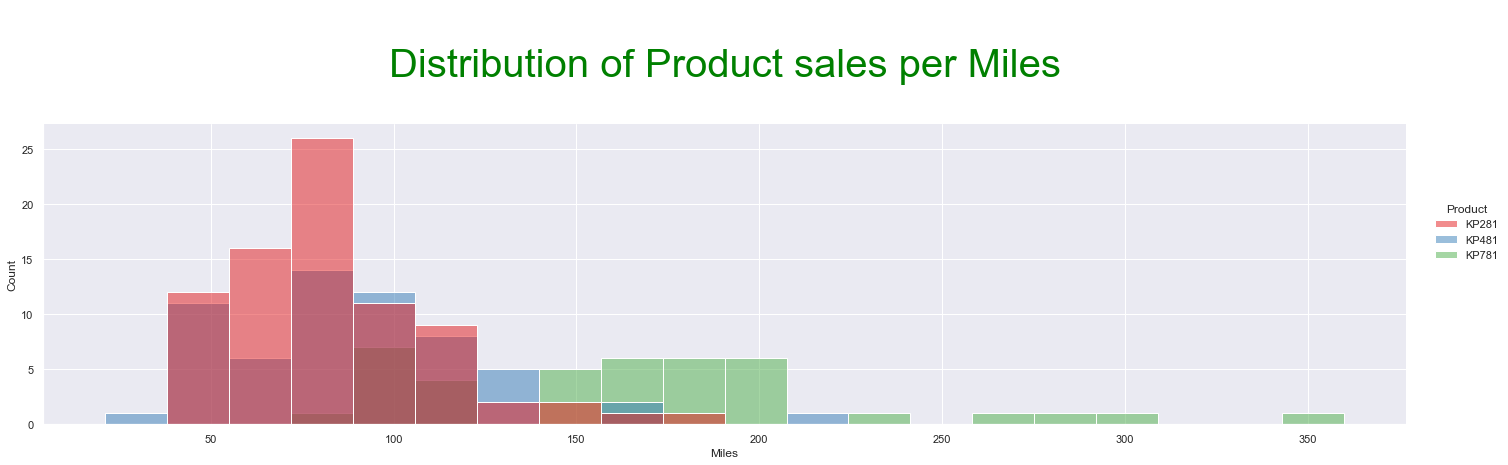

In [33]:
sns.displot(data=df, x='Miles', aspect=4, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Miles\n", fontsize=40, color="green")
plt.show()

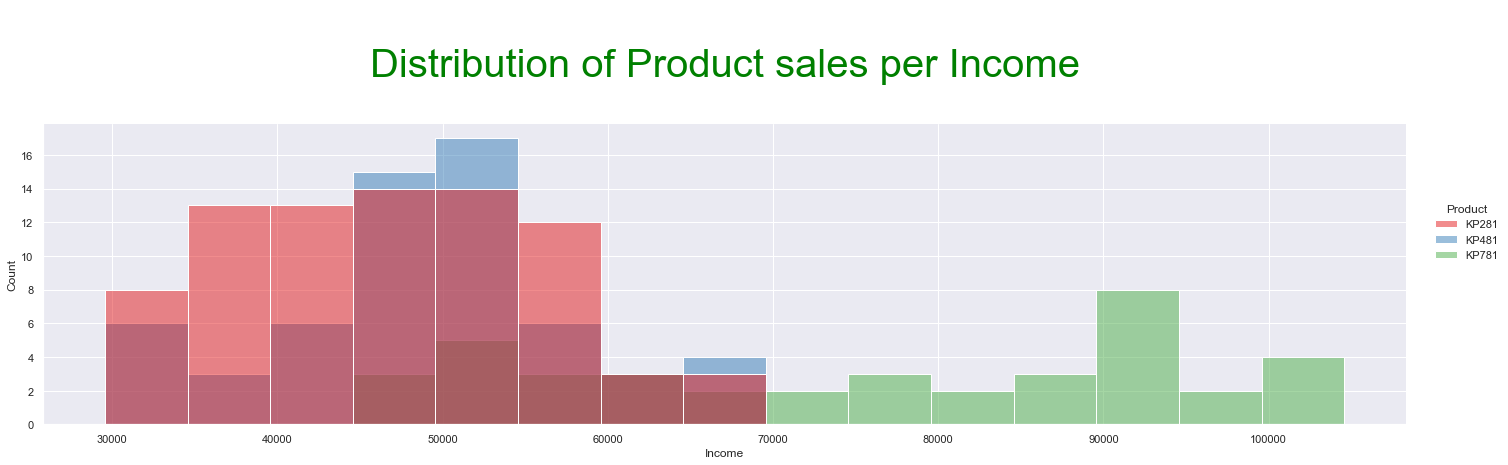

In [34]:
sns.displot(data=df, x='Income', aspect=4, hue='Product', palette="Set1")
plt.title("\nDistribution of Product sales per Income\n", fontsize=40, color="green")
plt.show()

# Correlation among different factors:

In [28]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x)=='Male' else 0)
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 1 if str(x)=='Partnered' else 0)
df['AgeCategory'] = df['Age'].apply(lambda x: int((int(x)-18)/4))
df['MilesCategory'] = df['Miles'].apply(lambda x: int(float(x)/50))
df['IncomeCategory'] = df['Income'].apply(lambda x: int((int(x)-30000)/5000))
df.drop(['Age', 'Miles', 'Income'], axis=1, inplace=True)
df.head()

,Product,Gender,Education,MaritalStatus,Usage,Fitness,AgeCategory,MilesCategory,IncomeCategory
0,KP281,1,14,0,3,4,0,2,0
1,KP281,1,15,0,2,3,0,1,0
2,KP281,0,14,1,4,3,0,1,0
3,KP281,1,12,0,3,3,0,1,0
4,KP281,1,13,1,4,2,0,0,1


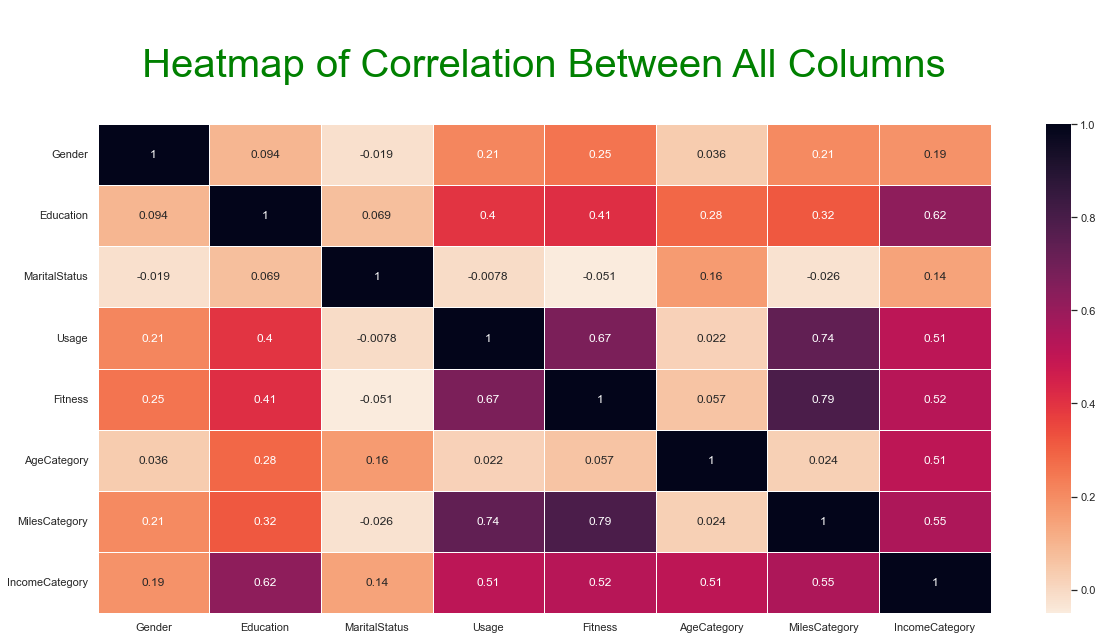

In [30]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=40, color="green")
plt.show()

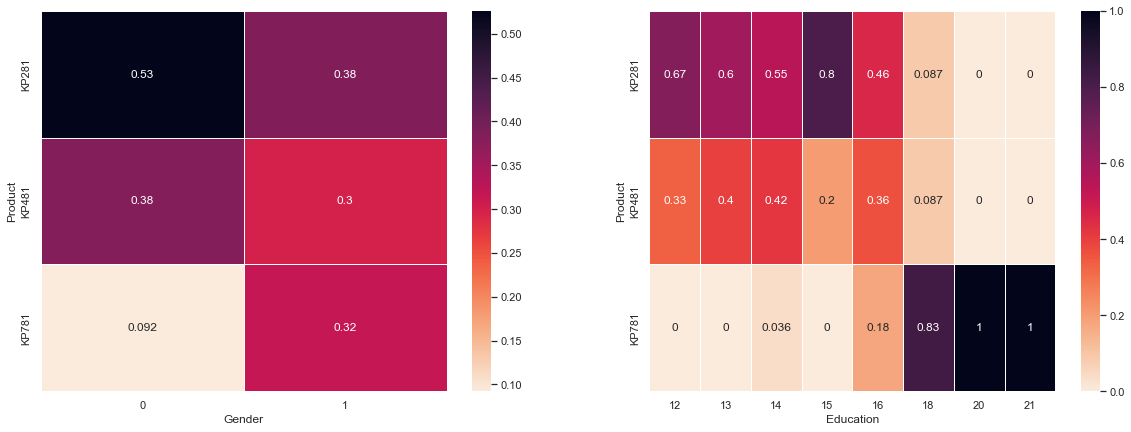

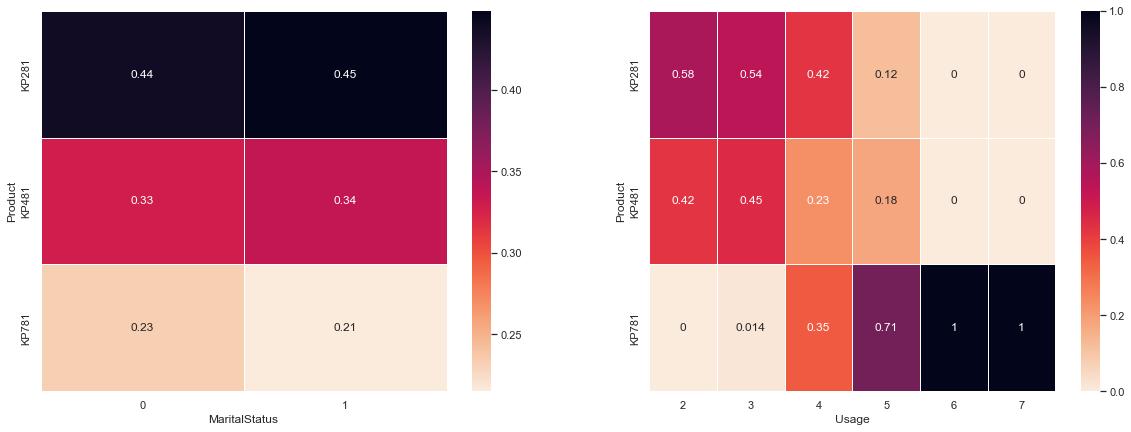

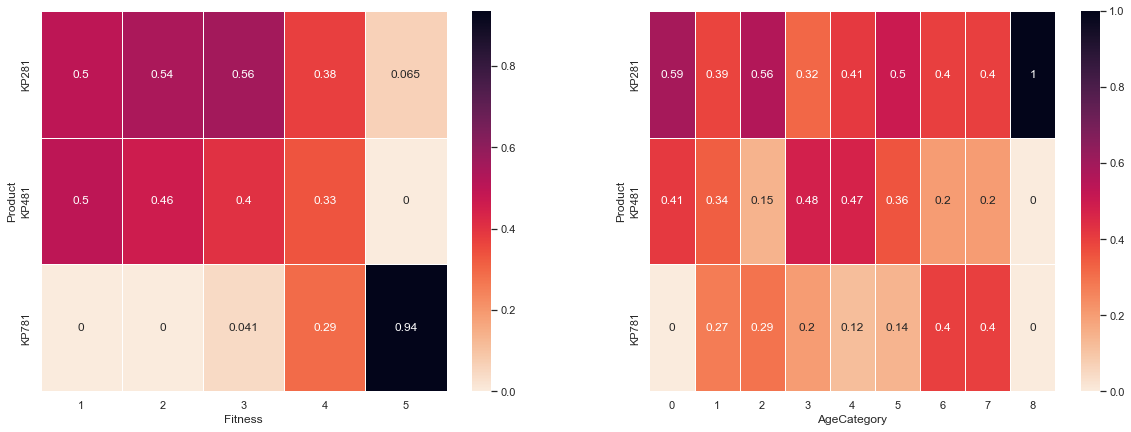

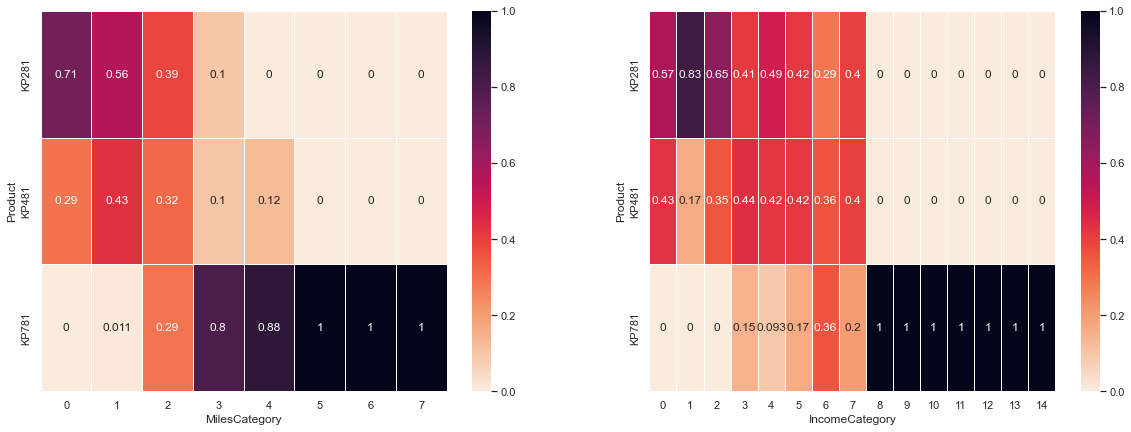

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
for i in range(1, len(df.columns)):
    y = (i-1)%2
    sns.heatmap(pd.crosstab(df.Product, df[df.columns[i]], normalize='columns'), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax[y])
    if y == 1:
        plt.show()
        if i < len(df.columns)-1:
            fig, ax = plt.subplots(1, 2, figsize=(20,7))


# PairPlot

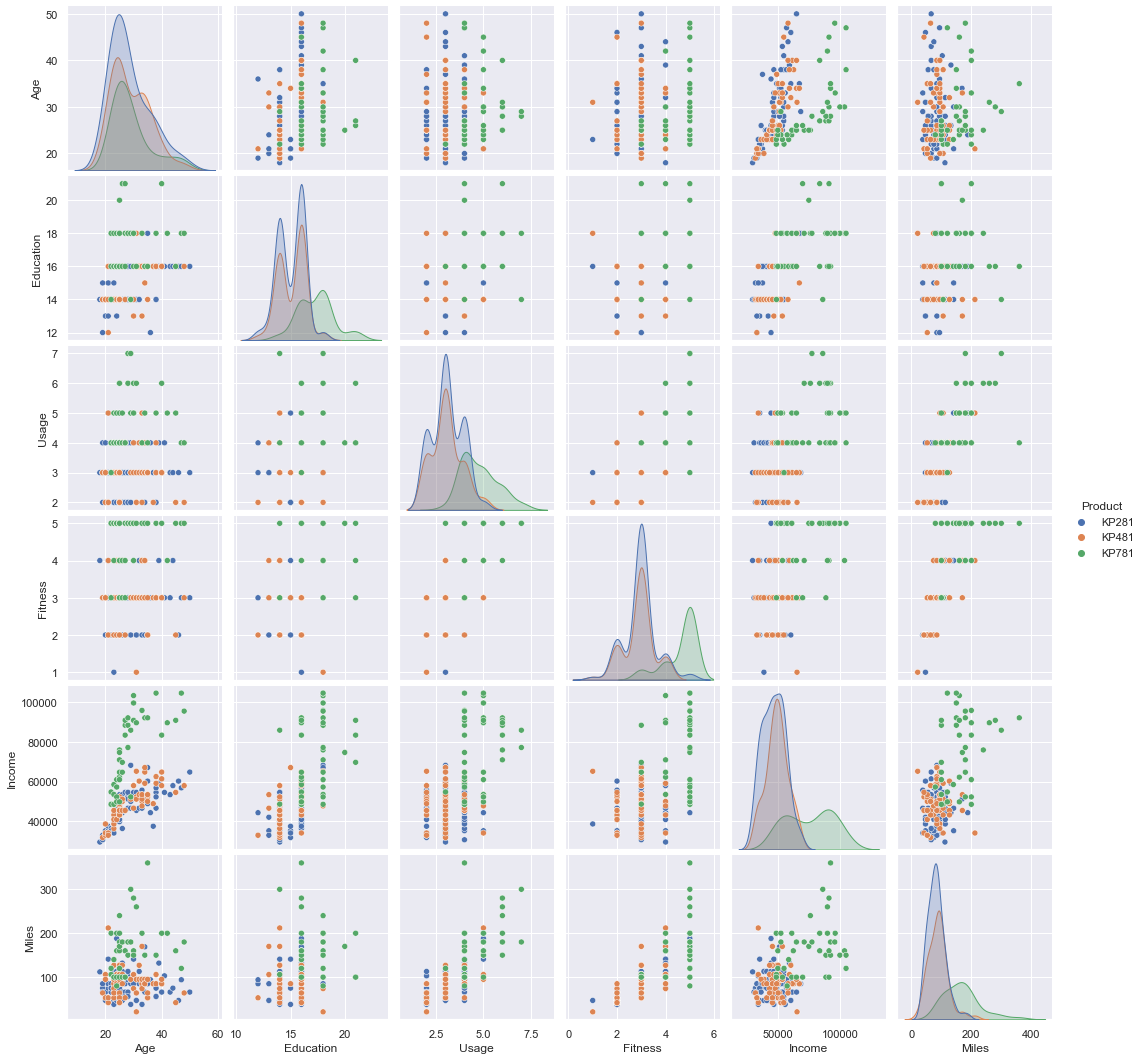

In [43]:
sns.set_style("darkgrid")
sns.pairplot(data=df, hue='Product')

plt.show()

From the above Pair Plot, it is observed :

1. Observing the Income- Miles Graph, we can see that high Income people are most likely to walk/run for miles greater than 200 and their age lies between 20-30


# Scatter Plot

Below plot showing the relation between age, Income and product

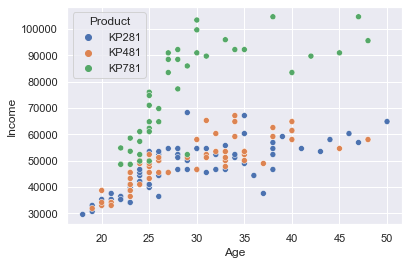

In [25]:
sns.scatterplot(data=df,x='Age',y='Income',hue='Product')
plt.show()

From the above scatter plot, it is clearly visible that the product KP781 is majorly purchased by the people having income>$70000 and this category of people didn't buy product KP281 and KP81.
That means for high class people product KP781 is most common.


In [11]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


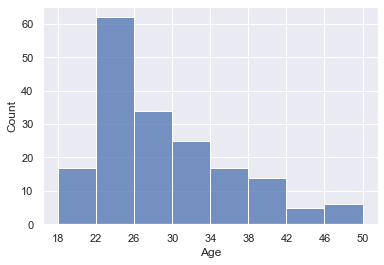

In [26]:
plt.xticks(np.arange(18,51,4))
sns.histplot(df['Age'], bins=8)
plt.show()

In [176]:
df['Age'].value_counts(bins=8).sort_index()

(17.967, 22.0]    24
(22.0, 26.0]      67
(26.0, 30.0]      29
(30.0, 34.0]      24
(34.0, 38.0]      18
(38.0, 42.0]       8
(42.0, 46.0]       5
(46.0, 50.0]       5
Name: Age, dtype: int64

The probability of buying any product between the age 22-26 is 67/180 i.e. 37%

In [186]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Some questions that can be answered from the above analysis:

1. What is the probability of a male customer buying a KP781 treadmill?
<br>Ans. 33/180 i.e. 18.33%


2. What is the probability of a female customer who is married and buying a KP481 treadmill?
<br>Ans. 15/180 i.e. 8.3%


3. What is the ideal duration of education for which the product are bought by the customer more often and what is their probability?
<br>Ans. Ideal duration of education is 16 where 85 customers buy treadmill out of which 39 buy KP281, 31 buy KP481 and 15 customers buy KP781.


4. What is the avearge Income of the customers buying the product KP781?
<br>Ans. 75441


5. Whic product is more likable for the customer whose age is above 40 years?
<br>Ans. KP281 and it's probability: P[KP281 | age>40] = 50%


6. Which product is more popular among the Age group of 22-26?
<br>Ans. KP281 and it's probability: P[KP281 | 21<Age<27]=31/74= 41.9%


7. What is the probability of a customer being single given that the customer buy the product KP281?
<br>Ans. 32/180 i.e. 17.77%


8. Which is the most common product among single male and single female?
<br>Ans. Single Man= KP281 and it's probability is P[KP281 | Single male]=19/43 i.e. 44.18%
<br>     Single Female= KP481 and it's probsbility is P[KP481 | Single Female]= 14/30 i.e. 46.66%


9. What is the average Fitness of the customer buying KP281?
<br>Ans. 2.97


10. What is the probability of customers whose Marital Status is Partnered and Usage is less than 4 buying the product KP481?
<br>Ans. 27/180 i.e. 15%


# Insights

1. The product KP281 is more likely to be purchased by the customers and it adds 120K to the revenue which is highest among all the 3 products.
<br>

2. Aerofit generates it's revenue more from the model KP281 as the buyers of this product is 33% more than average buyer of a single product.
<br>
3. Customers wose Marital Status is partnered are mre likely to buy a treadmill then Single ones.
<br>
4. Customers who are single buy the product KP281 with probability of 43%, KP481 with 33% and KP781 with 23%
<br>
5. Marital Customers also buy the product KP281 more than other products.
<br>
6. Customers with age 25 are the ones who buys more treadmill among all the other ages
<br>
7. The probability of buying a product KP781 in the age between 22 to 30 is 77.5% of the total sale product KP781.
<br>
8. The popularity of the product KP281 is equal among both the Genders
<br>
9. Probability of buying the product KP781 whose Usage is greater than 5 times a week on an average is 100%
<br>
10. High Income people are most likely to walk/run for miles greater than 200 and their age lies between 20-30.
<br>
11. The product KP781 is majorly purchased by the people having income>70000 and this category of people didn't buy product KP281 and KP81. 
<br>
12. In the age between 22-26, large no. of people buy treadmills than any other age group.
<br> 

# Recommendations:

1. Since the product KP281 is more likely to be sold and it's market share is 45%, So the stocked should be maintained for KP281 first, then KP481 and then KP781 to avoid any shortage.
<br>

2. The Audience withing the age of 22-26 should be targetted more often as this range of age is crucial for the revenue generation.
<br>

3. The advertisement for KP281 should be more among the social media as the audience with the age 22-26 are easily available and active there.
<br>

4. To increase the sell of the most expensive product i.e. KP781, it should be advertised among the high class people as they are the targetted audience for that product. It should be advertised in Branded Gyms, Lavish Hotels, Airports where the footfall of the high income people is more often. This way, revenue and profit margin can also be increased
<br>

5. Product should be showcased according to the fitness level also which helps people in choosing the right product according to their usage and fitness which helps in increasing the credibility of the Aerofit.
<br>

6. A scheme should be introduced where if someone wants to upgrade the product, then he is eligible to get a discount of 30%-40% of total amount of the previous product under specified terms and condition. This way Aerofit can hold their customers for a longer time and spread their business among larger audience. This also develop faith among the customers towards Aerofit and ultimately the brand value increases.

# -----------------------------------------------------------------------------
#                                                     Thanks

Submitted by: Rajat Shrimal
<br>
Email: shrimalrajat26@gmail.com